In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

In [3]:
import uproot
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from pylab import rcParams
import plotly.express as px
import os

In [66]:
branches_gen = ['event','genpart_pid','genpart_exphi',
              'genpart_exeta','genpart_gen','genpart_reachedEE',
              'genpart_pt', 'genpart_energy']
branches_tc = ['event', 'tc_subdet', 'tc_zside', 'tc_layer',
            'tc_mipPt', 'tc_energy', 'tc_pt', 'tc_eta', 'tc_phi',
              'tc_x', 'tc_y', 'tc_z', 'tc_simenergy']
#filename = '/data_cms_upgrade/sauvan/HGCAL/Ntuples/occupancy_study/DoublePhoton_FlatPt-1To100_Phase2HLTTDRWinter20DIGI-NoPU_110X_mcRun4_realistic_v3-v1/ntuple.root'
filename = '/data_cms_upgrade/sauvan/HGCAL/Ntuples/occupancy_study/FlatRandomPtGunProducer__20201022/ntuple_201120.root'
#filename = '/data_cms_upgrade/sauvan/HGCAL/Ntuples/occupancy_study/FlatRandomPtGunProducer__20201110/ntuple_201120.root'
treename = 'hgcalTriggerNtuplizer/HGCalTriggerNtuple'

In [67]:
gen_df = uproot.open(filename)[treename].pandas.df(branches_gen)
tc_df = uproot.open(filename)[treename].pandas.df(branches_tc)

In [68]:
gen_df = gen_df.query('genpart_gen>=0 & genpart_reachedEE==2 & abs(genpart_exeta)>1.6 & abs(genpart_exeta)<2.9 & genpart_pt>20 & genpart_pt<100')
#gen_df = gen_df.query('genpart_gen>=0  & abs(genpart_exeta)>1.6 & abs(genpart_exeta)<2.9')
gen_df['zside'] = np.where(gen_df.genpart_exeta>0, 1, -1)
gen_df = gen_df.reset_index().set_index(['entry', 'zside'])
gen_df

subentry  event  genpart_pid  genpart_exphi  genpart_exeta  \
entry zside                                                               
0      1            0      1           22      -1.800932       1.763112   
3      1            0      4           22      -2.102252       2.044388   
      -1            1      4           22       1.039316      -2.064724   
6      1            0      7           22       1.707615       2.712175   
7     -1            1      8           22       2.847994      -2.812884   
...               ...    ...          ...            ...            ...   
1987  -1            1    238           22       1.875734      -2.170146   
1990   1            0    241           22      -1.907388       2.306815   
1991  -1            1    242           22       1.442131      -2.153673   
1999   1            0    250           22       1.133173       2.780289   
      -1            1    250           22      -2.008406      -2.768790   

             genpart_gen  genpart_reachedEE  genpart_pt  genpart_energy  
entry zside                                                              
0      1               1                  2   59.430420      178.587372  
3      1               1                  2   36.755638      145.756073  
      -1               2                  2   36.755638      145.756073  
6      1               1                  2   47.943630      362.466858  
7     -1               2                  2   83.126060      706.278198  
...                  ...                ...         ...             ...  
1987  -1               2                  2   96.879158      434.844940  
1990   1               1                  2   95.899406      490.258484  
1991  -1               2                  2   35.147293      154.092926  
1999   1               1                  2   33.247585      267.532532  
      -1               2                  2   33.247585      267.532532  

[849 rows x 9 columns]

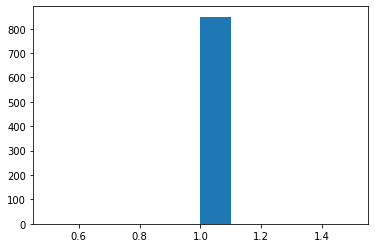

In [69]:
plt.hist(gen_df.groupby(['entry', 'zside']).count().genpart_energy)
plt.show()

In [70]:
tc_df = tc_df[tc_df.tc_simenergy>0]
tc_df.rename(columns={'tc_zside': 'zside'}, inplace=True)
tc_df = tc_df.reset_index().set_index(['entry', 'zside'])
tc_df

subentry  event  tc_subdet  tc_layer  tc_mipPt  tc_energy  \
entry zside                                                              
0     -1          276      1          2        30  0.227427   0.047617   
      -1          463      1          1        19  0.357535   0.029159   
      -1          464      1          1        19  0.281022   0.022169   
      -1          465      1          1        19  0.219972   0.018563   
       1          492      1          1        21  0.684070   0.058869   
...               ...    ...        ...       ...       ...        ...   
1999  -1         2987    250          2        29  0.234967   0.193402   
      -1         2988    250          2        29  0.180055   0.141928   
      -1         2989    250          2        29  0.114543   0.098923   
      -1         2990    250          2        29  0.586842   0.483958   
      -1         2991    250          2        29  1.056805   0.870738   

                tc_pt    tc_eta    tc_phi       tc_x        tc_y        tc_z  \
entry zside                                                                    
0     -1     0.013928 -1.900306  1.378873  21.771978  112.044800 -373.149017   
      -1     0.010158 -1.715852  1.323731  31.704401  125.702454 -348.832764   
      -1     0.007984 -1.680284  1.423669  19.741468  133.209839 -348.832764   
      -1     0.006250 -1.752152  1.365200  25.462872  122.098907 -348.832764   
       1     0.019435  1.772946 -1.761578 -23.332361 -120.811127  351.802765   
...               ...       ...       ...        ...         ...         ...   
1999  -1     0.023470 -2.798474 -2.157425 -24.884953  -37.438747 -367.699005   
      -1     0.017985 -2.754869 -2.129111 -24.884953  -39.841118 -367.699005   
      -1     0.011442 -2.846874 -2.132484 -22.804441  -36.237564 -367.699005   
      -1     0.058619 -2.800401 -2.103962 -22.804441  -38.639931 -367.699005   
      -1     0.105563 -2.799488 -2.050445 -20.723932  -39.841118 -367.699005   

             tc_simenergy  
entry zside                
0     -1         0.051292  
      -1         0.032249  
      -1         0.021114  
      -1         0.017382  
       1         0.065437  
...                   ...  
1999  -1         0.272062  
      -1         0.179595  
      -1         0.136792  
      -1         0.550928  
      -1         0.893939  

[1479241 rows x 13 columns]

In [71]:
def cluster(row):
    ntc = row.shape[0]
    sumpt = np.sum(row.tc_pt)
    return pd.Series((ntc,sumpt))

In [72]:
clusters = tc_df.groupby(['entry', 'zside']).apply(cluster)
clusters.columns = ['ntc', 'sumpt']

In [73]:
clusters_df = gen_df.join(clusters, how='left')

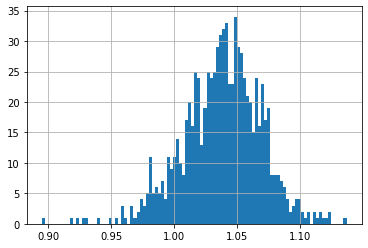

1.0382638545349978


In [74]:
plt.hist(clusters_df.sumpt / clusters_df.genpart_pt, bins=100)
plt.grid()
plt.show()
print(np.mean(clusters_df.sumpt / clusters_df.genpart_pt))

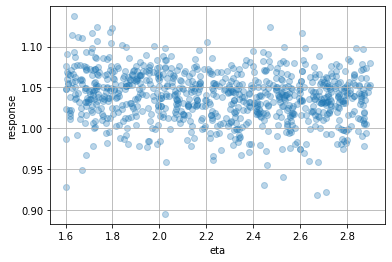

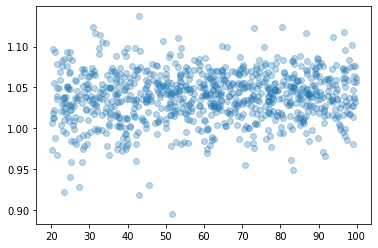

In [75]:
plt.scatter(np.abs(clusters_df.genpart_exeta), clusters_df.sumpt / clusters_df.genpart_pt, alpha=0.3)
plt.xlabel('eta')
plt.ylabel('response')
plt.grid()
plt.show()
plt.scatter(clusters_df.genpart_pt, clusters_df.sumpt / clusters_df.genpart_pt, alpha=0.3)

In [24]:
thresholds = np.arange(0.5, 2.2, step=0.2)
clusters_df = []
for threshold in thresholds:
    print('Threshold = ', threshold)
    tc_th = tc_df[tc_df.tc_mipPt>threshold]
    clusters = tc_th.groupby(['event', 'zside']).apply(cluster)
    clusters.columns = ['ntc_th{:3.1f}'.format(threshold), 'sumpt_th{:3.1f}'.format(threshold)]
    clusters_df.append(clusters)
join_df = gen_df.join(clusters_df, how='left')

Threshold =  0.5
Threshold =  0.7
Threshold =  0.8999999999999999
Threshold =  1.0999999999999999
Threshold =  1.2999999999999998
Threshold =  1.4999999999999998
Threshold =  1.6999999999999997
Threshold =  1.8999999999999997
Threshold =  2.0999999999999996


In [33]:
join_df

genpart_pid  genpart_exphi  genpart_exeta  genpart_gen  \
event  zside                                                           
184087 -1            22.0      -2.045267      -2.454621          2.0   
184079  1            22.0       0.810039       1.754615          2.0   
184077  1            22.0       2.475756       1.978353          1.0   
       -1            22.0      -0.665825      -1.972232          2.0   
184085  1            22.0      -0.872458       2.514664          1.0   
...                   ...            ...            ...          ...   
188727 -1            22.0      -0.113154      -2.722822          2.0   
188742 -1            22.0      -0.956907      -2.128352          1.0   
188743  1            22.0       1.621536       1.930054          2.0   
188733  1            22.0      -0.875340       2.702108          1.0   
188747  1            22.0       3.022176       1.836215          2.0   

              genpart_reachedEE  genpart_pt  genpart_energy  ntc_th0.5  \
event  zside                                                             
184087 -1                   2.0   17.448227      101.648224      108.0   
184079  1                   2.0   50.712860      154.791931      185.0   
184077  1                   2.0   46.636906      171.330246      191.0   
       -1                   2.0   46.636906      171.330246      210.0   
184085  1                   2.0   23.064737      145.996597      116.0   
...                         ...         ...             ...        ...   
188727 -1                   2.0   63.895966      483.307190      223.0   
188742 -1                   2.0   49.653736      212.560211      204.0   
188743  1                   2.0   89.428711      314.771240      302.0   
188733  1                   2.0   89.526367      670.203857      261.0   
188747  1                   2.0   66.138939      212.705246      237.0   

              sumpt_th0.5  ntc_th0.7  ...  ntc_th1.3  sumpt_th1.3  ntc_th1.5  \
event  zside                          ...                                      
184087 -1       17.088247       84.0  ...       56.0    15.861299       53.0   
184079  1       51.368614      153.0  ...      106.0    49.522331       93.0   
184077  1       46.270607      165.0  ...      111.0    44.357323       95.0   
       -1       46.249649      174.0  ...      112.0    43.834999      100.0   
184085  1       23.535223       98.0  ...       68.0    22.424026       63.0   
...                   ...        ...  ...        ...          ...        ...   
188727 -1       63.557655      183.0  ...      111.0    60.883518      102.0   
188742 -1       48.005440      174.0  ...      112.0    45.781406       96.0   
188743  1       92.391426      247.0  ...      173.0    89.256546      151.0   
188733  1       87.853104      205.0  ...      140.0    84.540627      129.0   
188747  1       68.683105      206.0  ...      137.0    66.293854      126.0   

              sumpt_th1.5  ntc_th1.7  sumpt_th1.7  ntc_th1.9  sumpt_th1.9  \
event  zside                                                                
184087 -1       15.740112       49.0    15.563952       44.0    15.305203   
184079  1       49.014072       85.0    48.650925       78.0    48.289486   
184077  1       43.726212       86.0    43.316051       76.0    42.812363   
       -1       43.363274       86.0    42.731331       78.0    42.323536   
184085  1       22.227777       54.0    21.816570       48.0    21.501732   
...                   ...        ...          ...        ...          ...   
188727 -1       60.530186       91.0    60.023190       87.0    59.825813   
188742 -1       45.169495       87.0    44.759995       76.0    44.193939   
188743  1       88.387444      131.0    87.363251      120.0    86.670471   
188733  1       84.098381      117.0    83.551392      110.0    83.190155   
188747  1       65.856331      114.0    65.304985      106.0    64.897751   

              ntc_th2.1  sumpt_th2.1  
event  zside                    

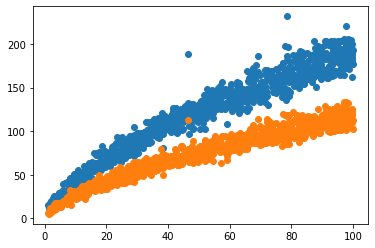

In [28]:
plt.scatter(join_df.genpart_pt, join_df['ntc_th1.1'])
plt.scatter(join_df.genpart_pt, join_df['ntc_th2.1'])

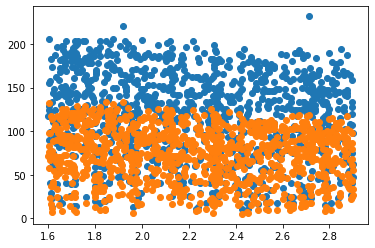

In [32]:
plt.scatter(np.abs(join_df.genpart_exeta), join_df['ntc_th1.1'])
plt.scatter(np.abs(join_df.genpart_exeta), join_df['ntc_th2.1'])

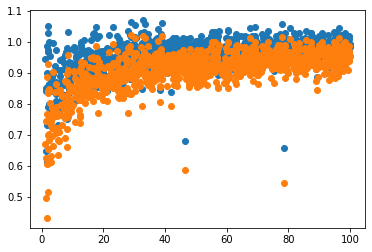

In [29]:
plt.scatter(join_df.genpart_pt, join_df['sumpt_th1.1']/join_df.genpart_pt)
plt.scatter(join_df.genpart_pt, join_df['sumpt_th2.1']/join_df.genpart_pt)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rescaled_df = pd.DataFrame(scaler.fit_transform(join_df), columns=join_df.columns)

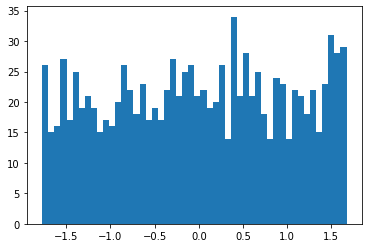

In [50]:
plt.hist(rescaled_df.genpart_pt, bins=50)
plt.show()

In [49]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
kernel = 1.*RBF(length_scale=0.1,length_scale_bounds=(0.01,1))+WhiteKernel(noise_level=1,noise_level_bounds=(1e-10,10))
gp = GaussianProcessRegressor(kernel=kernel, 
                              alpha=1e-10, random_state=0, 
                              n_restarts_optimizer=5).fit(rescaled_df.genpart_pt.values.reshape(-1,1), rescaled_df['ntc_th1.1'])


In [60]:
xs = np.arange(-2,2,step=0.01)
mu, cov = gp.predict(xs.reshape(-1,1),return_cov=True)
sigma = np.sqrt(np.diag(cov))

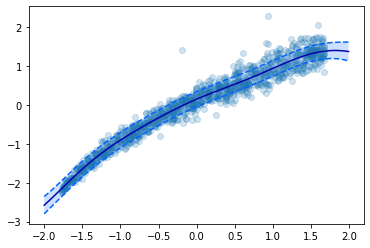

In [61]:
plt.plot(xs, mu, color='#0504aa', label='Mean 1D')
plt.plot(xs, (mu+sigma), color='#0165fc', linestyle='--')
plt.plot(xs, (mu-sigma), color='#0165fc', linestyle='--')
plt.fill_between(xs, (mu+sigma),(mu-sigma),alpha=0.2, fc='#0165fc', label='Accuracy interval 1D')
plt.scatter(rescaled_df.genpart_pt, rescaled_df['ntc_th1.1'], alpha=0.2)
plt.show()

In [57]:
tc_test = tc_df.query('entry==1 & zside==1 & tc_simenergy>0')
tc_test['xz'] = tc_test.tc_x/np.abs(tc_test.tc_z)
tc_test['yz'] = tc_test.tc_y/np.abs(tc_test.tc_z)

/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
tc_test

subentry  event  tc_subdet  tc_layer  tc_mipPt  tc_energy  \
entry zside                                                              
1     1           475      2          1        11  0.436244   0.095654   
      1           508      2          1         5  0.289196   0.040693   
      1           551      2          1        11  0.417509   0.066805   
      1           552      2          1        11  0.282931   0.043120   
      1           554      2          1        11  1.289647   0.230680   
...               ...    ...        ...       ...       ...        ...   
      1          3158      2          2        29  0.247878   0.146826   
      1          3160      2          2        29  0.260886   0.140610   
      1          3161      2          2        29  0.394918   0.209541   
      1          3205      2          2        30  0.119737   0.044491   
      1          3268      2          2        29  0.117722   0.078026   

                tc_pt    tc_eta    tc_phi       tc_x       tc_y        tc_z  \
entry zside                                                                   
1     1      0.012388  2.732934  1.640274  -3.055181  43.902790  336.952759   
      1      0.008216  2.282752  1.387868  12.301889  66.498077  328.042755   
      1      0.011856  2.414113  1.412514   9.577878  60.005169  336.952759   
      1      0.008034  2.364613  1.354105  13.738898  62.407532  336.952759   
      1      0.036622  2.527162  1.380067  10.271382  53.198460  336.952759   
...               ...       ...       ...        ...        ...         ...   
      1      0.024760  2.465975  1.607551  -2.311678  62.865662  367.699005   
      1      0.026059  2.370057  1.524111   3.236349  69.271973  367.699005   
      1      0.039448  2.354107  1.554397   1.155839  70.473152  367.699005   
      1      0.007333  2.489176  1.349465  13.688898  60.834820  373.149048   
      1      0.011759  2.579827  1.625326  -3.055181  55.972351  367.699005   

             tc_simenergy        xz        yz  
entry zside                                    
1     1          0.033768 -0.009067  0.130294  
      1          0.036441  0.037501  0.202712  
      1          0.041923  0.028425  0.178082  
      1          0.022640  0.040774  0.185212  
      1          0.128003  0.030483  0.157881  
...                   ...       ...       ...  
      1          0.094718 -0.006287  0.170970  
      1          0.098897  0.008802  0.188393  
      1          0.155163  0.003143  0.191660  
      1          0.054683  0.036685  0.163031  
      1          0.083298 -0.008309  0.152223  

[438 rows x 15 columns]

In [59]:
px.scatter(tc_test, x='xz', y='yz', color='tc_energy')

In [55]:
tc_test[['xz', 'yz']].values

array([[-0.13193381,  0.03818321],
       [-0.1479583 ,  0.02893142],
       [ 0.01337249, -0.1280192 ],
       ...,
       [-0.06433772, -0.06939916],
       [-0.16441058,  0.04612712],
       [ 0.01578903, -0.18504895]], dtype=float32)

In [76]:
db = DBSCAN(eps=0.005, min_samples=10).fit(tc_test[['xz', 'yz']].values)

(array([ 57.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 141.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <a list of 10 Patch objects>)

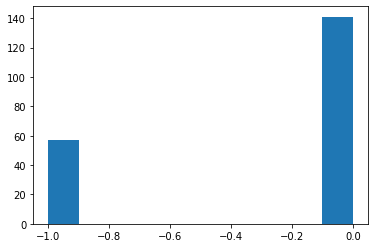

In [77]:
plt.hist(db.labels_)

In [78]:
tc_test[db.labels_!=-1]

,index,entry,subentry,event,tc_subdet,tc_zside,tc_layer,tc_mipPt,tc_energy,tc_pt,tc_eta,tc_phi,tc_x,tc_y,tc_z,tc_simenergy,xz,yz
64,64,0,64,184087,1,-1,15,0.751372,0.129297,0.021347,-2.487457,-2.101371,-29.045973,-49.508308,-342.892792,0.128916,-0.084709,-0.144384
66,66,0,66,184087,1,-1,15,4.009594,0.689583,0.113916,-2.486881,-2.059531,-26.965462,-50.709492,-342.892792,0.715898,-0.078641,-0.147887
67,67,0,67,184087,1,-1,15,5.525685,0.948177,0.156989,-2.484586,-2.017812,-24.884953,-51.910675,-342.892792,0.975184,-0.072574,-0.151390
68,68,0,68,184087,1,-1,15,0.665506,0.118522,0.018908,-2.522260,-2.036555,-24.884953,-49.508308,-342.892792,0.135843,-0.072574,-0.144384
81,81,0,81,184087,1,-1,19,0.760828,0.129297,0.021616,-2.474774,-1.991211,-24.141447,-53.999260,-348.832764,0.137247,-0.069206,-0.154800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,2145,0,2145,184087,1,-1,25,0.448722,0.075423,0.012749,-2.463622,-1.975228,-24.141447,-56.401627,-357.742798,0.074073,-0.067483,-0.157660
2243,2243,0,2243,184087,1,-1,21,0.126375,0.021549,0.003590,-2.478220,-1.951002,-22.060938,-55.200439,-351.802765,0.030274,-0.062708,-0.156907
2244,2244,0,2244,184087,1,-1,21,0.377291,0.064648,0.010719,-2.483134,-1.991211,-24.141447,-53.999260,-351.802765,0.056677,-0.068622,-0.153493
2293,2293,0,2293,184087,1,-1,23,0.626728,0.107747,0.017806,-2.486510,-1.951002,-22.060938,-55.200439,-354.772736,0.102877,-0.062183,-0.155594


In [80]:
px.scatter(tc_test[db.labels_!=-1], x='xz', y='yz', color='tc_pt')